In [1]:
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

data = pd.read_csv("propertydata.csv", na_values=["na", "--"])
data

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000,201.0,BERKELEY,12,1.0,NaN,700.0
4,100005000,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000,213.0,TREMONT,Y,1.0,1,NaN
8,100009000,215.0,TREMONT,Y,NaN,2,1800.0


<AxesSubplot:>

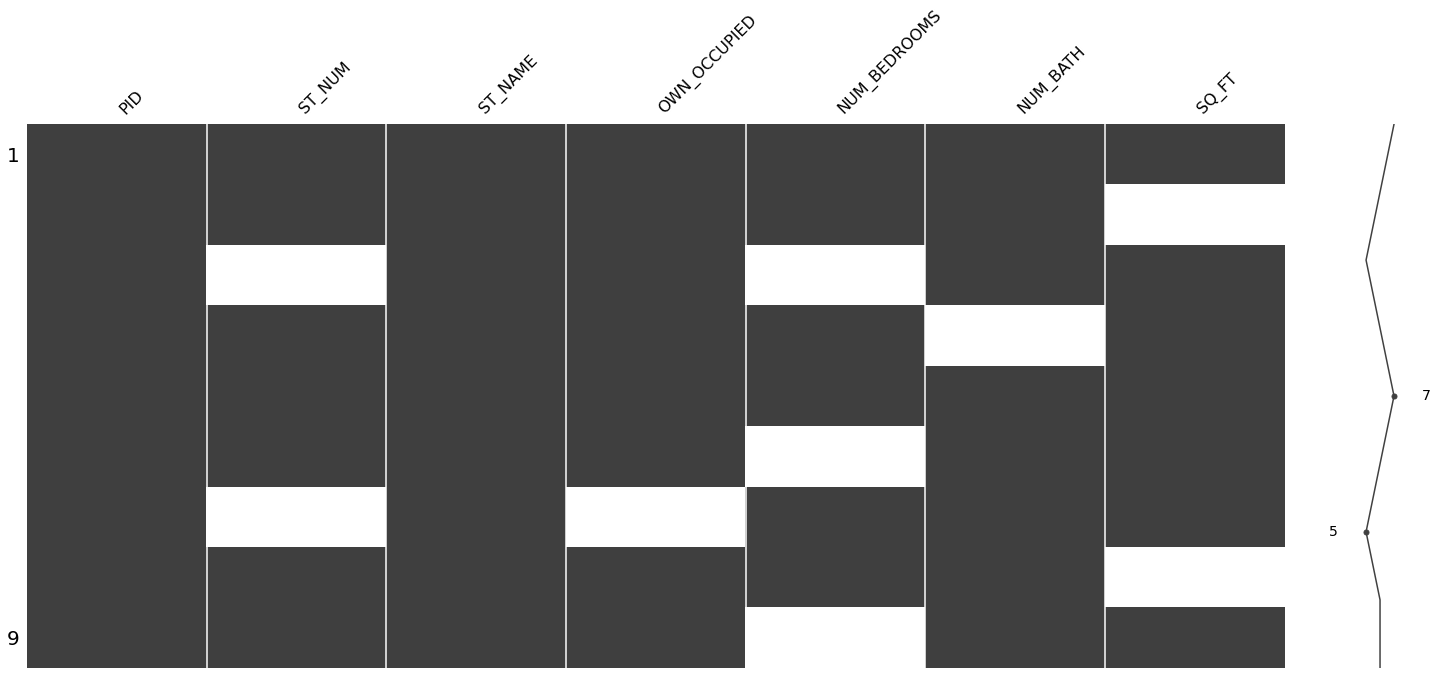

In [2]:
msno.matrix(data)

<AxesSubplot:>

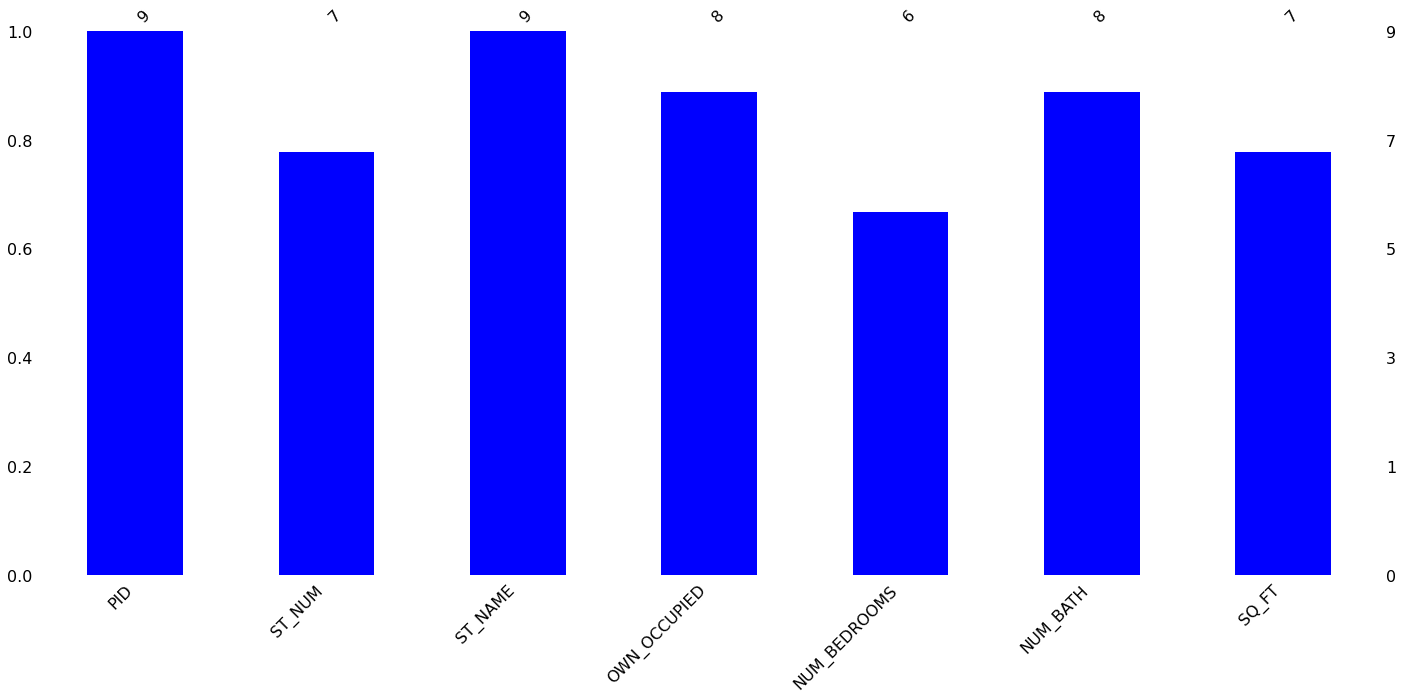

In [3]:
msno.bar(data, color="blue")

In [4]:
    # Handle OWN_OCCUPIED
    cnt = 0
    for row in data['OWN_OCCUPIED']:
        try:
            # Try to cast value to int
            int(row)
            # If possible, replace that value
            data.loc[cnt, 'OWN_OCCUPIED'] = np.nan
        except ValueError:
            pass
        cnt += 1

In [5]:
    # Handle NUM_BATH
    cnt = 0
    for row in data['NUM_BATH']:
        try:
            # Try to cast value to float
            float(row)
        except ValueError:
            # If NOT possible, replace that value
            data.loc[cnt, 'NUM_BATH'] = np.nan
        cnt += 1

<AxesSubplot:>

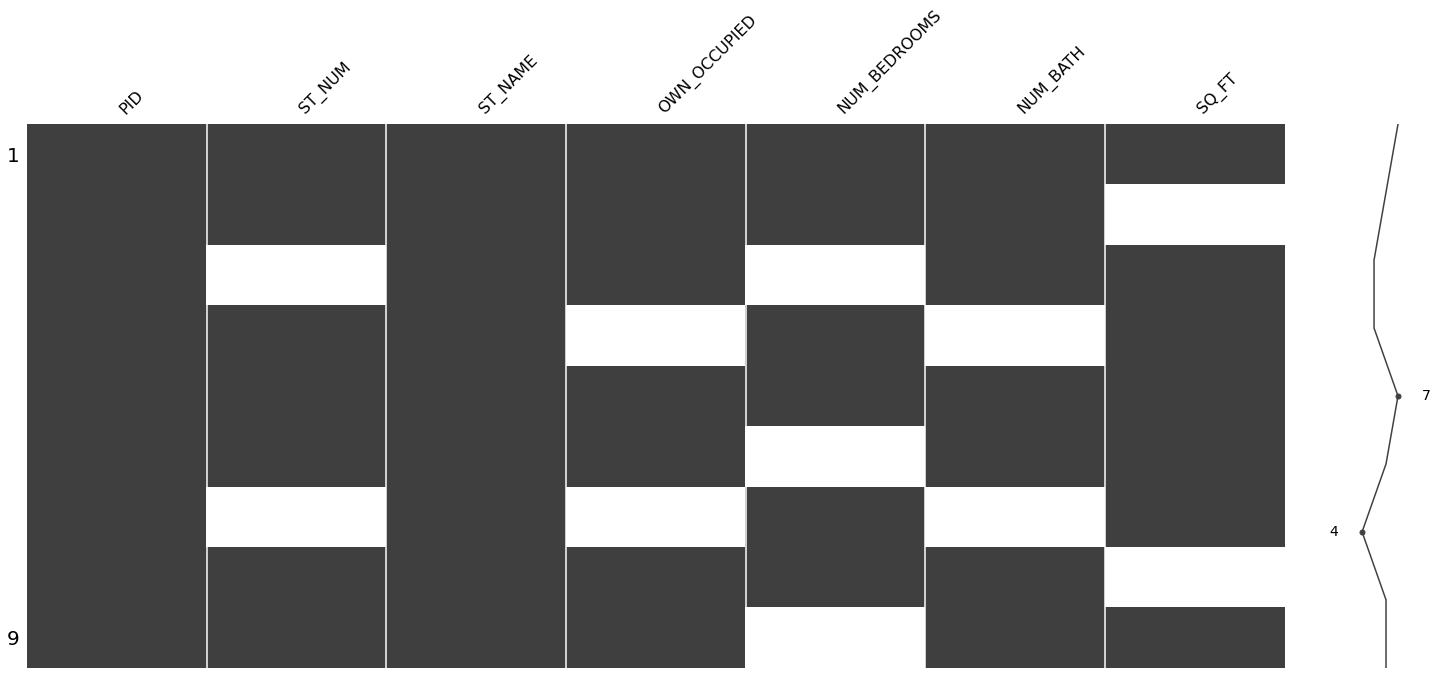

In [6]:
msno.matrix(data)

In [7]:
    # Handle ST_NUM, NUM_BEDROOMS, NUM_BATH, SQ_FT
    # Perform mean imputation and down-cast to int to get rid of values like 2.167 bedrooms
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

    data['ST_NUM'] = imp_mean.fit_transform(data['ST_NUM'].values.reshape(-1, 1))
    data['ST_NUM'] = data['ST_NUM'].astype(int)

    data['NUM_BEDROOMS'] = imp_mean.fit_transform(data['NUM_BEDROOMS'].values.reshape(-1, 1))
    data['NUM_BEDROOMS'] = data['NUM_BEDROOMS'].astype(int)

    data['NUM_BATH'] = imp_mean.fit_transform(data['NUM_BATH'].values.reshape(-1, 1))
    data['NUM_BATH'] = data['NUM_BATH'].astype(int)

    data['SQ_FT'] = imp_mean.fit_transform(data['SQ_FT'].values.reshape(-1, 1))
    data['SQ_FT'] = data['SQ_FT'].astype(int)

<AxesSubplot:>

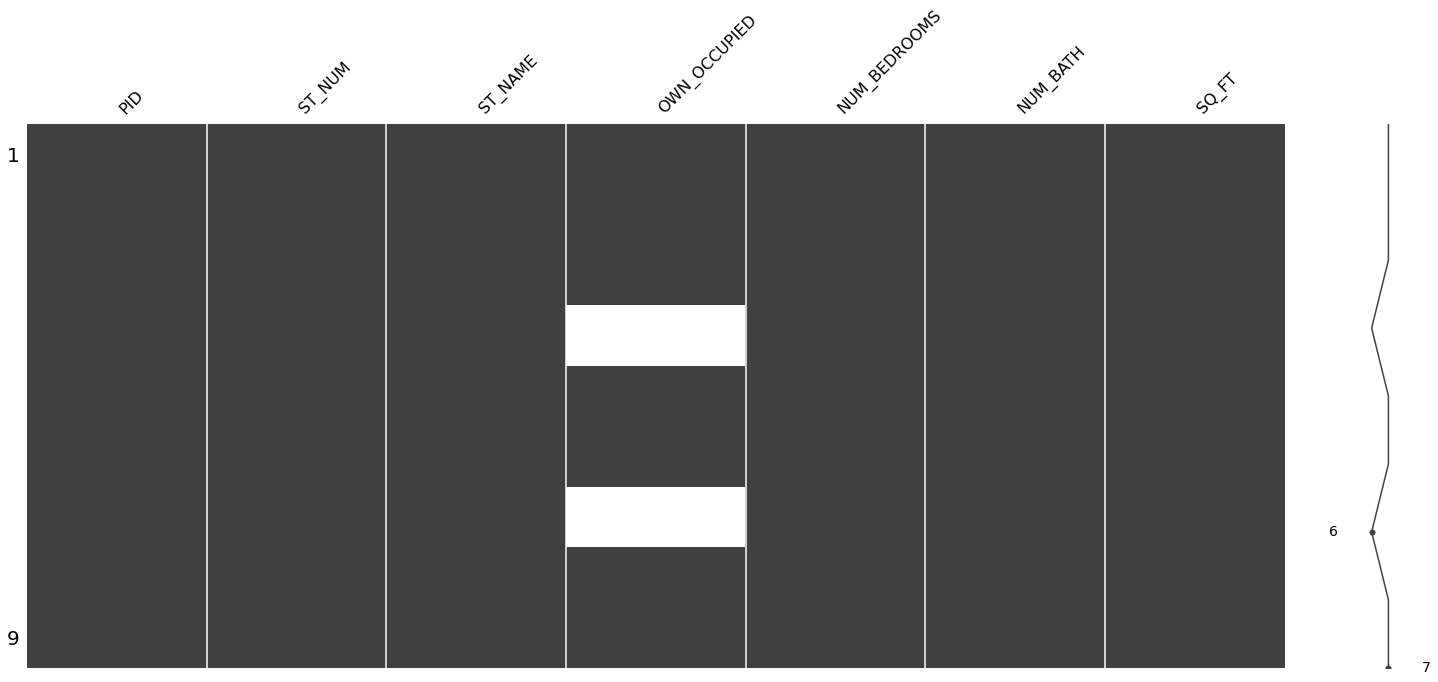

In [8]:
msno.matrix(data)

<AxesSubplot:>

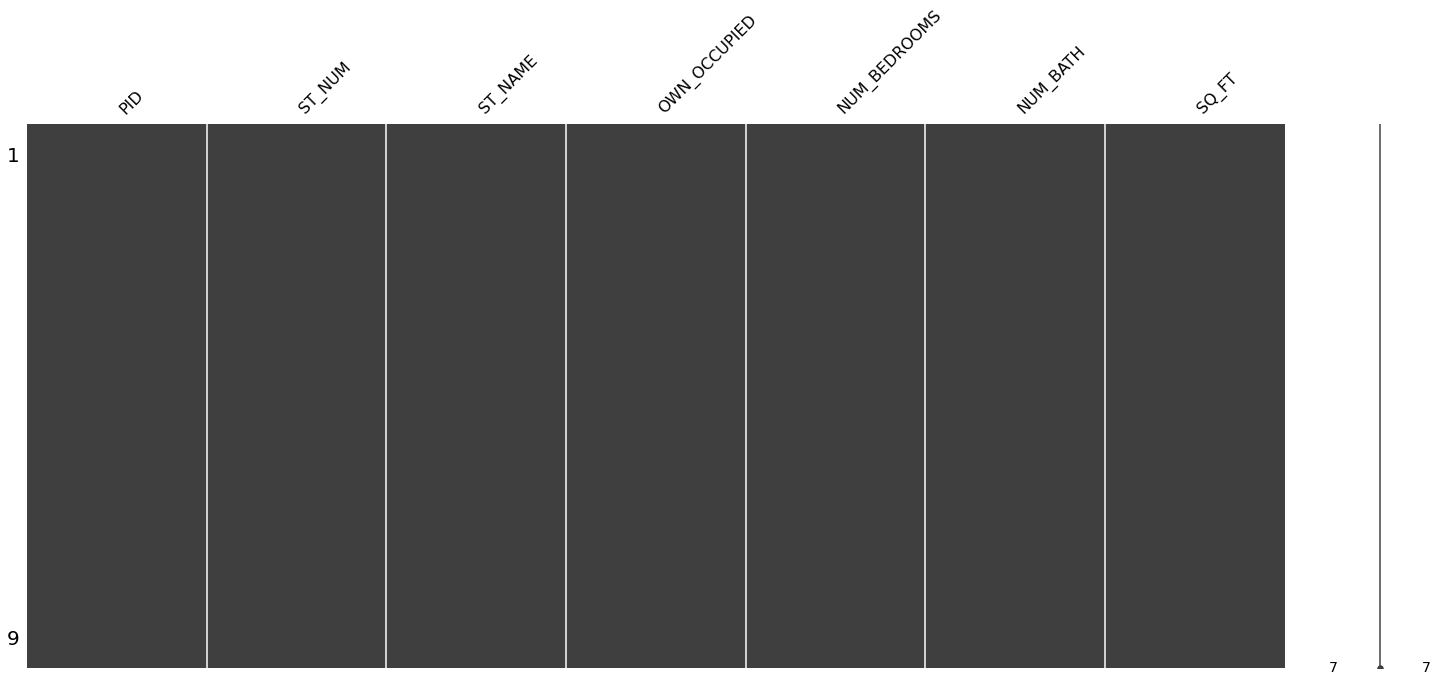

In [9]:
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['OWN_OCCUPIED'] = imp_most_frequent.fit_transform(data['OWN_OCCUPIED'].values.reshape(-1, 1))

msno.matrix(data)